<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

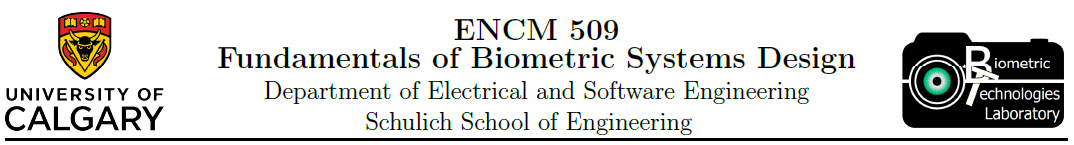

# Lab 2 - Report 

#### UCID: 30085789
#### Name: Abhay Khosla

## Introduction 
In biometrics one of the key aspect is identity recognition we mainly will be focusing on identification of words such as "Labs" and another word "Four" in this lab report. Identification means to having many templates and matching it to the submitted input data. We generally perform a lookup in the database to check if the person is impostor or not. This can be used for positive and negative recognition of the person. Another concept which will be covered is verification which identifies samples into two classes genuine user or impostor. This differs from identification because in here we only have one to one comparison. During the lab session we got to explore and understanding the inner working of signature data acquisition in our case we used words and through this report we will take a look at the underlying statistical analysis. During the lab we performed a collection of genuine and forged word samples. 

In [2]:
# Required libraries for Lab 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm

# to keep a good size for the plot figure, not the plot area!
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

**Exercise 1** (2 marks): Consider a random sample of a normally distributed data with mean $\mu = 50$ and standard deviation $\sigma = 5$. The Scipy's function `norm.rvs(...)` is used to draw samples from a normal distribution.
- Create another set of 1000 samples with $\mu = 50$ and $\sigma = 5$.
- Plot the histogram with 100 bins.
- Compare the results of the calculations of both sets. What conclusions can be drawn from the amount of samples compared with the mean and standard deviation calculated and the number of bins considered? 

In [139]:
# Exercise 1
# Theorectical Mean and Std
mu = 50
std = 5
qtt_samples1 = 80
# Exercise 1 creating another set of samples 
qtt_samples2 = 1000

pop_norm1 = norm.rvs(mu, std, size=qtt_samples1)
# Exercise 1 creating another population 
pop_norm2 = norm.rvs(mu, std, size=qtt_samples2)

### Population Normal 1 Histogram of 80 samples and 10 bins

REAL mean: 50.47; std: 4.72


Text(0.5, 1.0, 'Histogram 80 samples')

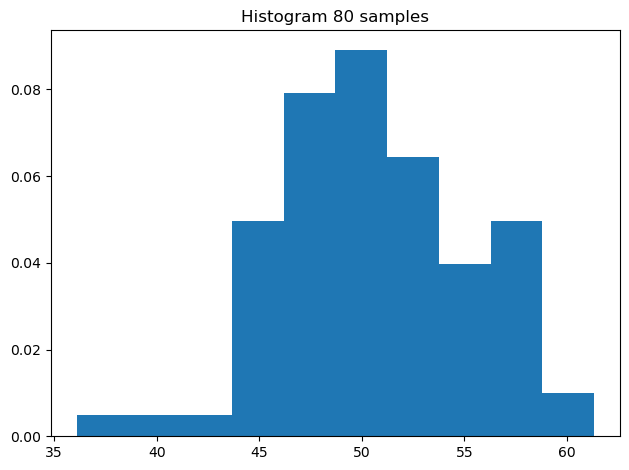

In [140]:
# As mentioned in the lab document that we need to plot the sample 1 with 10 bins
plt.hist(pop_norm1, density=True, bins=10)
print('REAL mean: %.2f; std: %.2f' % (np.mean(pop_norm1), np.std(pop_norm1)))
plt.title("Histogram 80 samples")

### Population Normal 1 Histogram of 1000 samples and 100 bins

REAL mean: 50.47; std: 5.24


Text(0.5, 1.0, 'Histogram 1000 samples')

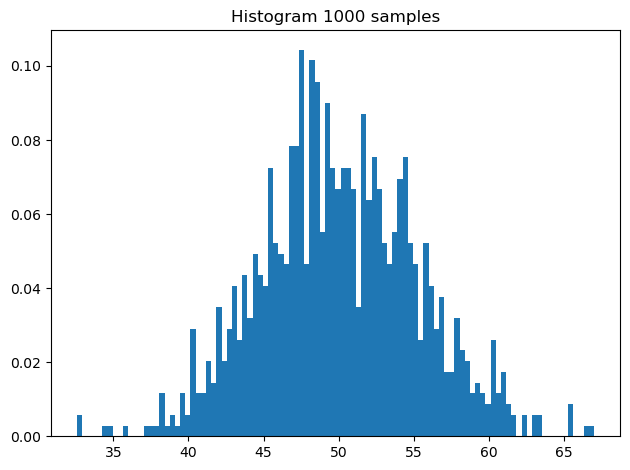

In [141]:
# Need to specify the bins as mentioned in Ex 1 
plt.hist(pop_norm2, density=True, bins=100)
print('REAL mean: %.2f; std: %.2f' % (np.mean(pop_norm1), np.std(pop_norm2)))
plt.title("Histogram 1000 samples")

| Statistics |      Pop Norm 1     |  Pop Norm 2 |
|----------|:-------------:|------:|
| Real Mean |  50.47 | 50.47 |
| Standard Deviation |    4.72   |   5.24 |

### Combined Histograms of Population Normal 1 and Population Normal 2

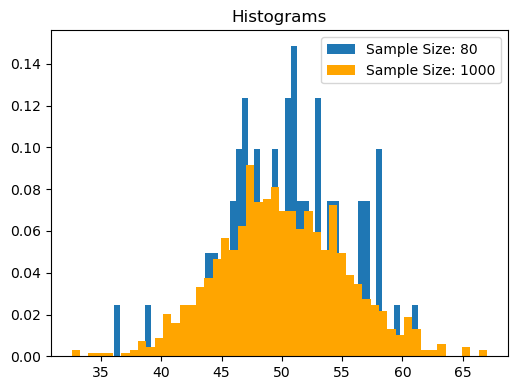

In [143]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(pop_norm1, bins=50, density=True)
plt.hist(pop_norm2, bins=50, density=True, color='orange')
plt.title('Histograms')
plt.legend(['Sample Size 1: 80', 'Sample Size 2: 1000'])


### Combined Normal Distributions of Population Normal 1 and Population Normal 2

Text(0.5, 1.0, 'Normal Distributions')

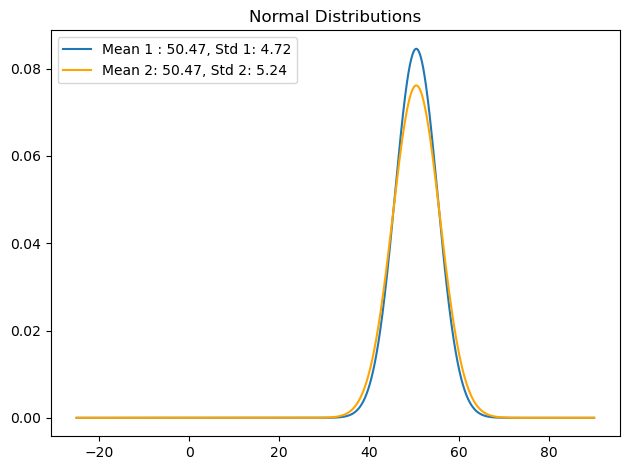

In [360]:
mu1, std1 = 50.47, 4.72 # blue
mu2, std2 = 50.47, 5.24 # orange
x1 = np.arange(-25, 90, 0.01)
plt.plot(x1, norm.pdf(x1, loc=mu1, scale=std1))
plt.plot(x1, norm.pdf(x1, loc=mu2, scale=std2), color='orange')
plt.legend(['Mean 1 : 50.47, Std 1: 4.72', 'Mean 2: 50.47, Std 2: 5.24'])
plt.title('Normal Distributions')

### Comparsion of Population Normal 1 and Population Normal 2 Standard Deviation and Mean with Histograms and Normal Distributions Curves
As seen in the combined histograms a larger sample size, the calculate mean and standard deviation are more likely to converge to the population's true parameters, this is evident from this histogram as the larger sample size provides a smoother and more bell-shaped distribution which is a characteristic of the normal distribution. The histogram with 80 samples has fewer bins and appears more blocky and less smooth. In contrast, the histogram with 1000 samples has more bins and presents a more detailed picture of the distribution, including its variability. Both curves have similar means (around 50.47), indicating that both sample sizes provided a similar estimate of the population mean. However, the standard deviation is slightly higher in the second curve, which may be due to the larger sample size capturing more of the variability present in the population. 

- **Exercise 2** (1 marks): Consider a sample data of the word *Biometrics* written by a "genuine" person, and an "impostor" as a signature that replicates the shape but not the original pressure. Load the sample signature provided. Plot the signature in 2D with the color representing the pressure on each point. Similarly to calculation of the mean and std of the random data, calculate the mean and std of the pressure for one signature, and plot the Normal distribution.

In [4]:
# data folder:
# 'signature_samples/biometrics/'
# 'signature_samples/calgary/'
# 'signature_samples/hello/'
# Exercise 2-word lab
# 'signature_samples/labs/'

# 'genuine' or 'impostor'
subdir = 'impostor/'
data_dir = 'signature_samples/biometrics/' + subdir

csv_file = pd.read_csv(data_dir + '1.csv')

coord1 = csv_file[['X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

## Plotting based on Pressure and Color Map

In [378]:
# to correctly map the pressure into the colormap the normalization is required 
prs1 = prs1 / np.max(prs1) * 255
prs1 = prs1.astype(int)

pressuremap = cm.get_cmap('jet', np.max(prs1)+1)

C:\Users\abhay\AppData\Local\Temp\ipykernel_17376\1866396150.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pressuremap = cm.get_cmap('jet', np.max(prs1)+1)


C:\Users\abhay\AppData\Local\Temp\ipykernel_17376\3323017129.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


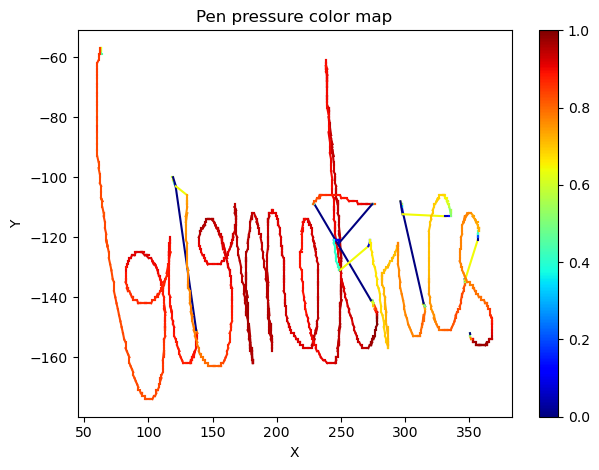

In [379]:
for i in range(len(prs1)-1):
    c = pressuremap(prs1[i]).squeeze()
    im = plt.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pen pressure color map')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm)

### Calculating Mean and Standard Deviation of Pressure of one Sample Signature

In [469]:
# Creating a vector array similar to Lab 1 
pressure_vector = [pressure[0] for pressure in prs1]

pressure_mean = np.mean(pressure_vector)
pressure_standard_deviation = np.std(pressure_vector)
# Generate x_values over a wide range to ensure smoothness of the curve
x_values = np.linspace(min(pressure_vector), max(pressure_vector))
print(pressure_mean, pressure_standard_deviation)

0.6393138217149262 0.1491067391963876


The following mean and standard deviation are from one sample signature sample of the word "biometrics":

Mean: 0.6393, Standard Deviation 0.1491

### Plotting Normal Distribution of Pressure of one Sample Signature

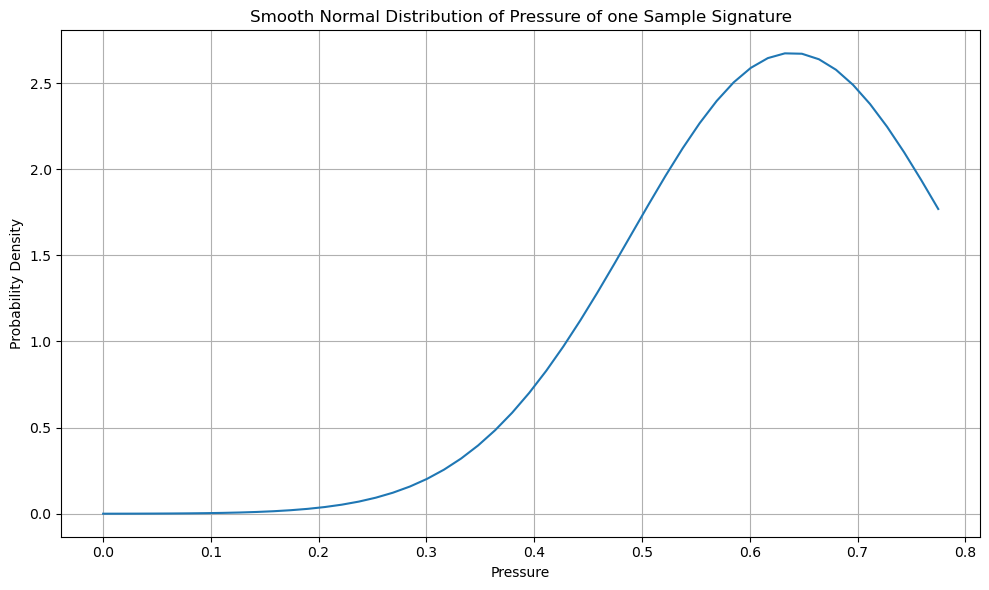

In [470]:
# Generate points for the normal distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x_values, norm.pdf(x_values, pressure_mean, pressure_standard_deviation))
plt.title('Smooth Normal Distribution of Pressure of one Sample Signature')
plt.xlabel('Pressure')
plt.ylabel('Probability Density')
plt.grid(True)

This probability density function indicates the likelihood of different pressure levels during the signing process.The curve's peak corresponds to the most likely pressure value, which is the mean of the data set. The distribution appears to be symmetric around this peak, which means that the pressure values during signature creation are as likely to be above as they are to be below the mean. 

**Exercise 3** (1 mark): The code to calculate velocity and plot velocity map of one signature, provided in this lab, has the following `if` statement: `if time_diff == 0:`. 
- Explain why it is necessary.
- Plot in 3D, where the third coordinate represents pressure.

C:\Users\abhay\AppData\Local\Temp\ipykernel_1484\594955456.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  velmap = cm.get_cmap('jet', np.max(vel)+1)
C:\Users\abhay\AppData\Local\Temp\ipykernel_1484\594955456.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt. colorbar(sm)


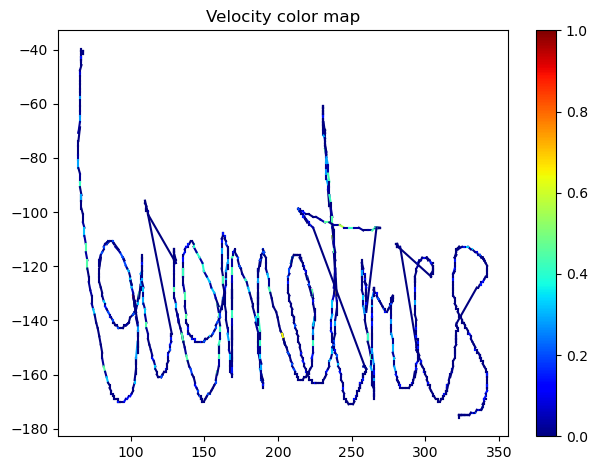

In [5]:
#Exercise 3
vel = np.zeros((len( time1)-1, 1))
for i in range (len( time1)-1):
    distance = np.sqrt ((coord1[i+1,0] - coord1 [i ,0])**2 + ( coord1 [i+1 ,1] - coord1 [i ,1])**2)
    # if too fast , time diff = 0
    time_diff = abs( time1 [i+1] - time1 [i])
    if time_diff != 0:
        vel[i] = distance / time_diff
    vel[i] = int(vel[i] * 1000) + 1

vel = np. insert (vel , 0, 1)
vel = vel / np.max(vel) * 255
vel = vel. astype (int)

velmap = cm.get_cmap('jet', np.max(vel)+1)

for i in range (len(vel)-1):
    c = velmap (vel[i])
    if time_diff < 17: # You may need to change this threshould
        im = plt.plot(coord1 [i:i+2 ,0] , -coord1 [i:i+2 ,1] , c=c)
plt.title ('Velocity color map')

sm = cm. ScalarMappable (cmap='jet', norm=plt. Normalize (vmin =0, vmax =1))
plt. colorbar(sm)


The ```time_diff``` not equal to zero is so that we can avoid errors while doing an integer division which is undefined mathematically and would cause an error in the program. In the context of this script, a ```time_diff``` of zero means that the two points being compared are recorded at the same time instant, implying an infinite velocity, which is not possible. 

### Plotting Pen Pressure in 3D

Text(0.5, 0.92, 'Pen pressure in 3D')

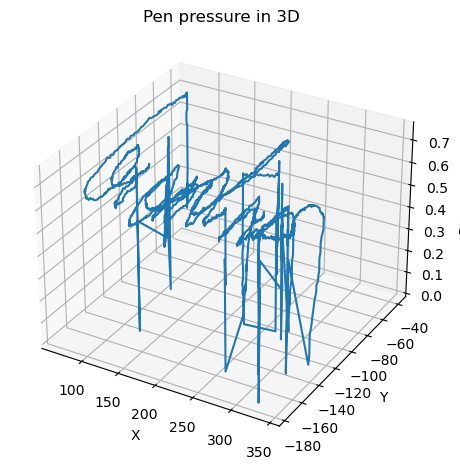

In [8]:
ax = plt.axes( projection ='3d')
# the line below is to reshape to vector using . flatten method
ax. plot3D (coord1 [: ,0]. flatten (), -coord1 [: ,1].flatten (), prs1.flatten ())
ax. set_xlabel('X')
ax. set_ylabel('Y')
ax. set_zlabel('Pressure')
ax. set_title('Pen pressure in 3D')

## Plotting presure over time

In [9]:
# removing outliers (after normalization): < 250 and > 150
prs = []
for x in prs1:
    if (x > 150 and x < 250):
        prs.append(x)

In [10]:
np.max(prs), np.min(prs), np.mean(prs)

ValueError: zero-size array to reduction operation maximum which has no identity

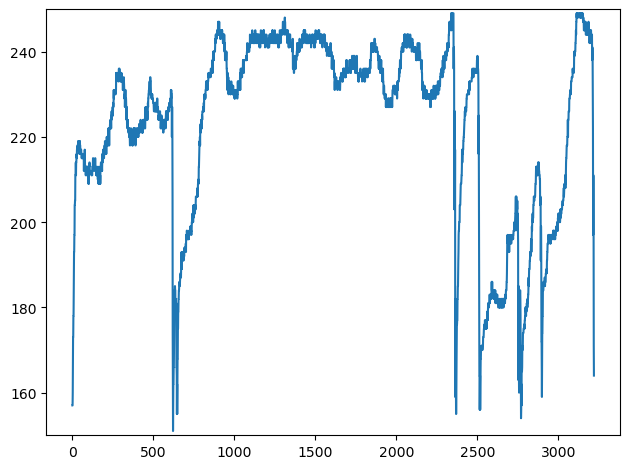

In [ ]:
plt.plot(prs)
plt.ylim([150, 250]);

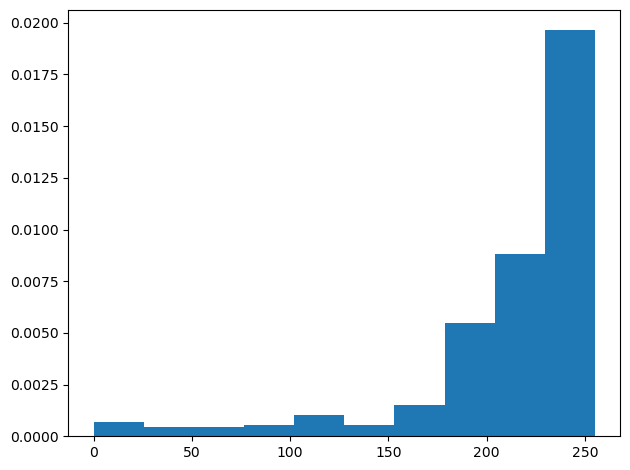

In [ ]:
plt.hist(prs1, density=True);

209.88135593220338 49.07581655729172


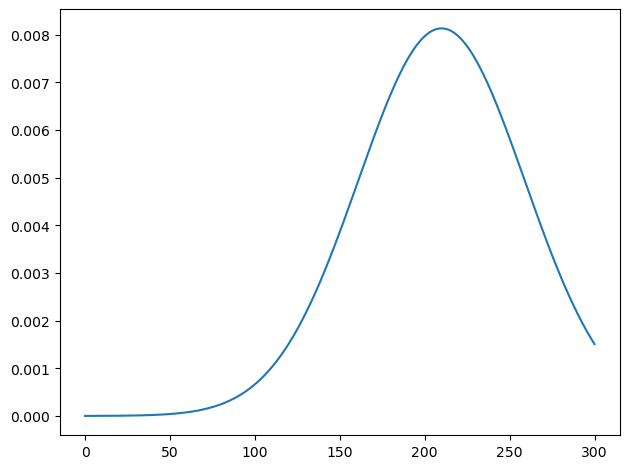

In [ ]:
mu_prs = np.mean(prs1)
std_prs = np.std(prs1)
print(mu_prs, std_prs)

x = np.arange(0, 300, 0.01)

x_pdf = norm.pdf(x, loc=mu_prs, scale=std_prs)

plt.plot(x, x_pdf);

## Plotting and calculating the Velocity

C:\Users\abhay\AppData\Local\Temp\ipykernel_17376\3937251973.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  velmap = cm.get_cmap('jet', np.max(vel)+1)
C:\Users\abhay\AppData\Local\Temp\ipykernel_17376\3937251973.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm);


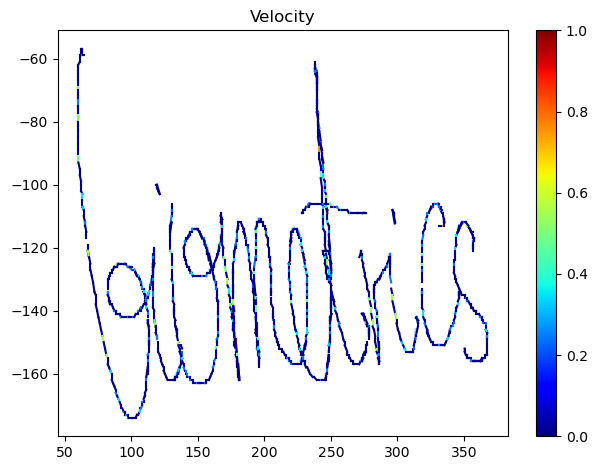

In [ ]:
vel = np.zeros((len(time1)-1, 1))

for i in range(len(time1)-1):
    distance = np.sqrt((coord1[i+1,0] - coord1[i,0])**2 + 
                       (coord1[i+1,1] - coord1[i,1])**2)

    # if too fast, time_diff = 0
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff != 0:
        vel[i] = distance / time_diff
    vel[i] = int(vel[i] * 1000) + 1

vel = np.insert(vel, 0, 1)
vel = vel / np.max(vel) * 255
vel = vel.astype(int)

velmap = cm.get_cmap('jet', np.max(vel)+1)

for i in range(len(vel)-1):
    c = velmap(vel[i])
    
    time_diff = abs(time1[i+1] - time1[i])
        
    if time_diff < 17: # You may need to change this threshould
        plt.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)
plt.title('Velocity')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);

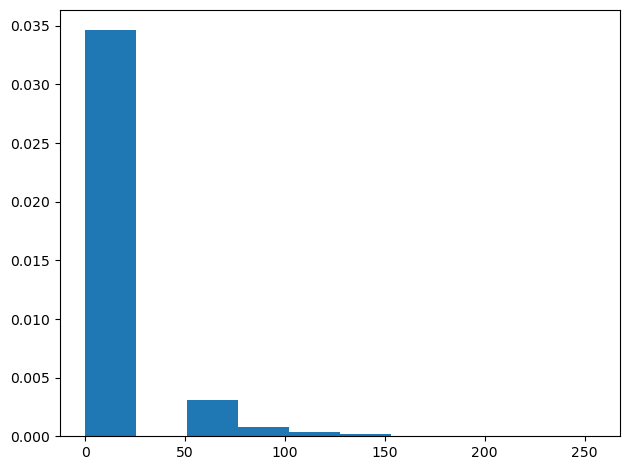

In [ ]:
plt.hist(vel, density=True);

## Plotting Pressure in 3D

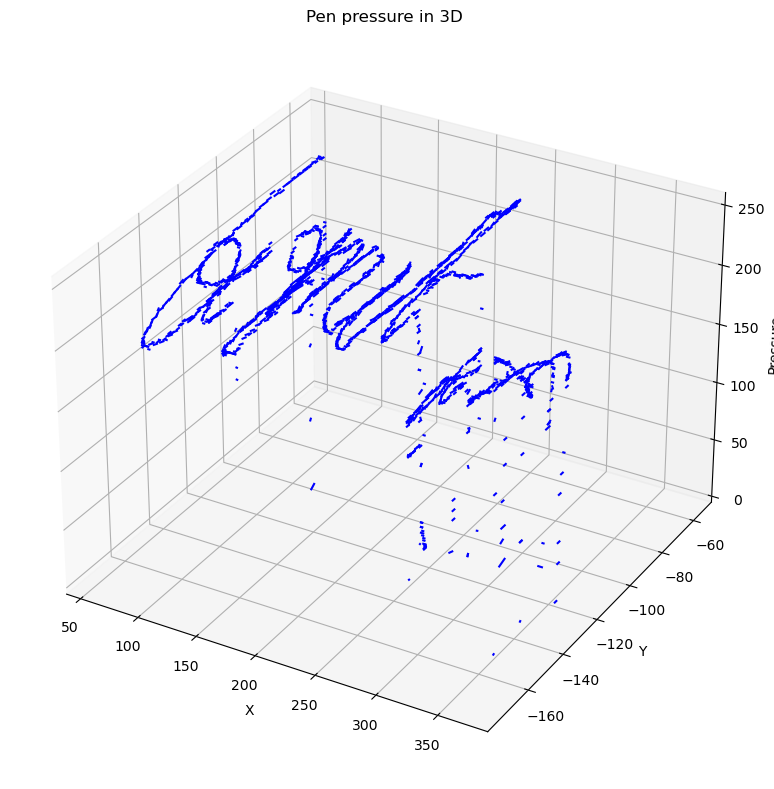

In [ ]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for i in range(len(coord1)-1):
    time_diff = abs(time1[i+1] - time1[i])
        
    if time_diff < 18: # You may need to change this threshould
        ax.plot3D(coord1[i:i+2,0], -coord1[i:i+2,1], prs1[i], color='blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D');

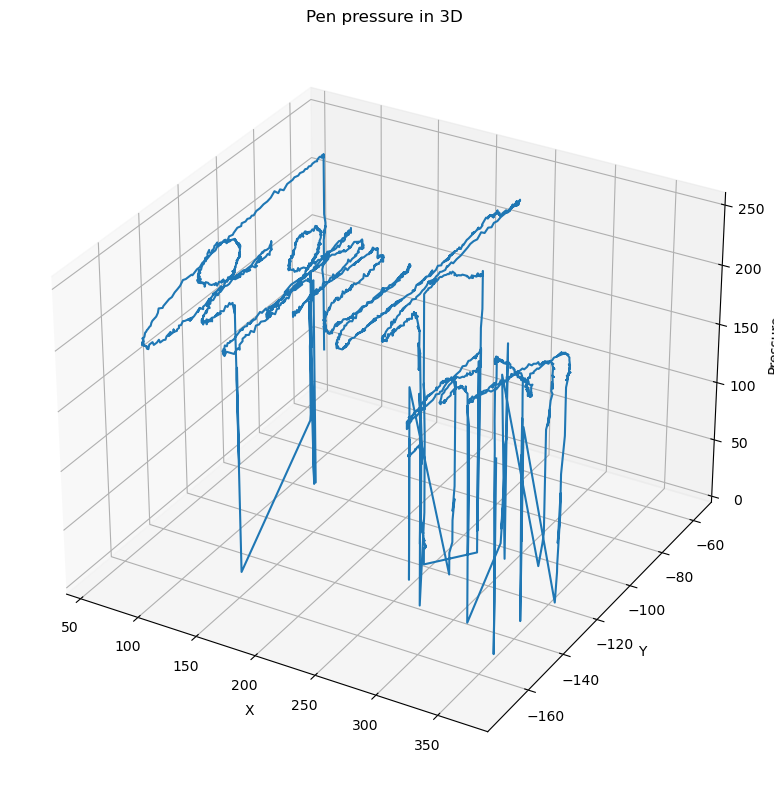

In [ ]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.plot3D(coord1[:,0].flatten(), -coord1[:,1].flatten(), prs1.flatten())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D');

## Statistical Evaluation

In [ ]:
def calc_velocity(time, coords):
    vel = np.zeros((len(time)-1, 1))

    for i in range(len(time)-1):
        distance = np.sqrt((coords[i+1,0] - coords[i,0])**2 +
                           (coords[i+1,1] - coords[i,1])**2)
        
        # if too fast time_diff = 0
        time_diff = time[i+1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001

        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1

    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

In [ ]:
# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures = np.zeros((30,4))

# using 10-30 signatures
for i in range(30):
    csv_file = pd.read_csv(data_dir + '%d.csv' % (i+1))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    stats_measures[i, 0] = np.mean(vel)
    stats_measures[i, 1] = np.std(vel)
    
    stats_measures[i, 2] = np.mean(prs1)
    stats_measures[i, 3] = np.std(prs1)
    
    print('#%d - pressure: %.2f; velocity: %.2f' %\
          (i, np.mean(prs1), np.mean(vel)))

#0 - pressure: 0.63; velocity: 11.20
#1 - pressure: 0.50; velocity: 9.83
#2 - pressure: 0.50; velocity: 12.17
#3 - pressure: 0.53; velocity: 15.97
#4 - pressure: 0.47; velocity: 16.27
#5 - pressure: 0.52; velocity: 18.06
#6 - pressure: 0.49; velocity: 11.96
#7 - pressure: 0.53; velocity: 13.95
#8 - pressure: 0.52; velocity: 10.02
#9 - pressure: 0.50; velocity: 12.55
#10 - pressure: 0.49; velocity: 19.25
#11 - pressure: 0.54; velocity: 14.77
#12 - pressure: 0.54; velocity: 16.59
#13 - pressure: 0.52; velocity: 10.51
#14 - pressure: 0.55; velocity: 17.67
#15 - pressure: 0.56; velocity: 17.65
#16 - pressure: 0.54; velocity: 12.37
#17 - pressure: 0.58; velocity: 9.33
#18 - pressure: 0.61; velocity: 10.27
#19 - pressure: 0.68; velocity: 15.83
#20 - pressure: 0.52; velocity: 11.14
#21 - pressure: 0.58; velocity: 18.02
#22 - pressure: 0.58; velocity: 7.16
#23 - pressure: 0.64; velocity: 11.04
#24 - pressure: 0.59; velocity: 17.19
#25 - pressure: 0.60; velocity: 10.20
#26 - pressure: 0.58; vel

In [ ]:
# getting only the 1st velocity 'mean' and 'std'
print(stats_measures[0,0], stats_measures[0,1])

n = norm(stats_measures[0,0], stats_measures[0,1])

11.195794053662073 28.915672643775643


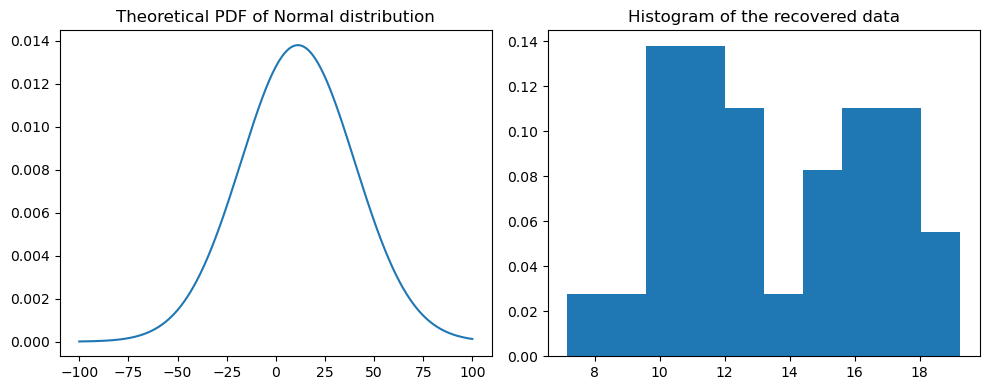

In [ ]:
x = np.arange(-100, 100, 0.1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, n.pdf(x))
plt.title('Theoretical PDF of Normal distribution');

plt.subplot(1,2,2)
plt.hist(stats_measures[:,0], density=True);
plt.title('Histogram of the recovered data');

# put the name of the set in the title

## Exercises

**General Marks**
1. Introduction (a paragraph about the purpose of the lab).
2. (10 marks) Description of the result on each exercise  with illustrations/graphs and analysis of the results (marks are distributed as shown in the Exercise section).
3. Conclusion (a paragraph on what is the main take-out of the lab).

**Specific Questions** (See the handout PDF for details)

- **Exercise 4** (3 marks): Now  perform statistical analysis of pressure and velocity distribution  across average values of pressure or 30 signatures of the same person. We will represent the pressure of each signature by its average (mean) value, and then consider the distribution of these average values across genuine signatures. Consider 30 genuine signatures (yours or pre-recorded sample set, part a), and calculate average (mean) values and deviation from average (which will be calculated using standard deviation) for pressure. Plot a normal distribution of the average pressure values across the 30 signatures of the same individual. Perform the same for velocity. 

- **Exercise 5** (3 marks): Perform statistical analysis of average pressure and velocity distribution across 30 impostor signatures. As an "impostor", you can use either the 30 "forged" signatures (or part $b$ of the pre-recorded set), or 30 writings by yourself, of different shape/word (or part $c$ of the pre-recorded set). Represent the pressure (or velocity) of each signature by its average (mean), and then consider the distribution of these averages across 30 impostor signatures. How different are those distributions for "genuine" signatures from Exercise 4 and the "impostor" from Exercise 5?